In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import itertools
import pickle

In [2]:
df = pd.read_csv('test_data.csv', index_col=0).set_index('id')
df.head()

,created_time,title,url
id,,,
354189,Sun Sep 20 2020 06:28:55 GMT+0000 (Coordinated...,Mein Standort nach lorsch kulturerbe - Google ...,https://www.google.com/maps/dir/49.5267539;8.5...
20596,Fri Jul 28 2017 08:56:17 GMT+0000 (Coordinated...,(60 ungelesen) – anonymizedName – Yahoo Mail,https://mg.mail.yahoo.com/neo/launch?.rand=94n...
513182,Thu Jul 25 2019 10:33:08 GMT+0000 (Coordinated...,Song of Healing 10 Hours - YouTube,https://www.youtube.com/watch?v=WXnWfx6bIVE&t=...
951408,Thu Jun 25 2020 10:02:49 GMT+0000 (Coordinated...,OpinionHUB,https://s.cint.com/Survey/Complete/0b7c19f0-6e...
632599,Fri Jul 17 2020 05:18:56 GMT+0000 (Coordinated...,Please Wait,https://qps.cint.com/survey/a369700d-bb9a-c1dc...


# time feautures selection

In [3]:
df['created_time'].str.contains('GMT+0000', regex=False).all()

True

In [4]:
month_dict = {'Jan': 1,'Feb': 2,'Mar': 3,'Apr': 4,'May': 5,'Jun': 6,'Jul': 7,'Aug': 8,'Sep': 9, 'Oct': 10,'Nov': 11,'Dec': 12}

In [5]:
df['month'] = [i[4:7] for i in df['created_time']]
df['month'].head()

id
354189    Sep
20596     Jul
513182    Jul
951408    Jun
632599    Jul
Name: month, dtype: object

In [6]:
df['created_time_datetime'] = df['month'].map(month_dict).astype('str')+' '+[i[7:-38] for i in df['created_time']]
df['created_time_datetime'] = pd.to_datetime(df['created_time_datetime'], format='%m %d %Y %H:%M:%S', errors='coerce')

In [7]:
df['created_time_datetime'][df['created_time_datetime'].isna()]

id
670341   NaT
Name: created_time_datetime, dtype: datetime64[ns]

In [8]:
df = df[~df['created_time_datetime'].isna()]

In [9]:
df['created_time_datetime'].min()

Timestamp('1970-01-01 00:00:00')

In [10]:
df['created_time_datetime'].max()

Timestamp('2020-10-25 13:27:27')

In [11]:
df['created_time_datetime'].max()-df['created_time_datetime'].min()

Timedelta('18560 days 13:27:27')

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 9.998e+03]),
 array([1970., 1975., 1980., 1985., 1990., 1995., 2000., 2005., 2010.,
        2015., 2020.]),
 <BarContainer object of 10 artists>)

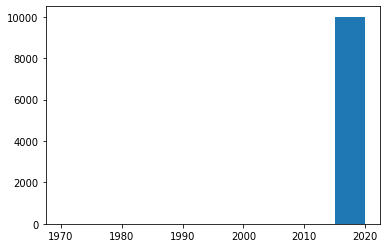

In [12]:
plt.hist(df['created_time_datetime'].dt.year)

In [13]:
df['created_time_datetime'][df['created_time_datetime'].dt.year<2010]

id
565157   1970-01-01
Name: created_time_datetime, dtype: datetime64[ns]

In [14]:
df = df[df['created_time_datetime'].dt.year>=2010]

In [15]:
df['created_time_datetime'].min()

Timestamp('2017-06-04 16:08:57')

(array([  14.,    0.,    0.,   89.,    0.,    0., 1196.,    0.,    0.,
        8699.]),
 array([2017. , 2017.3, 2017.6, 2017.9, 2018.2, 2018.5, 2018.8, 2019.1,
        2019.4, 2019.7, 2020. ]),
 <BarContainer object of 10 artists>)

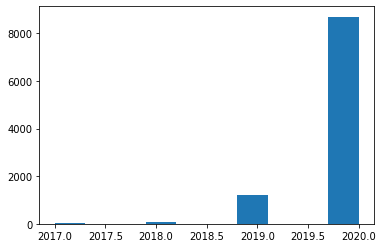

In [16]:
plt.hist(df['created_time_datetime'].dt.year)

<AxesSubplot:>

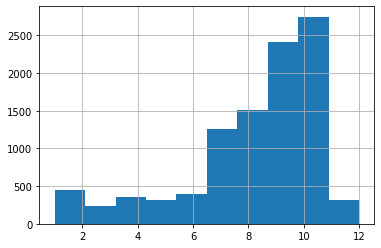

In [17]:
df['created_time_datetime'].dt.month.hist()

<AxesSubplot:>

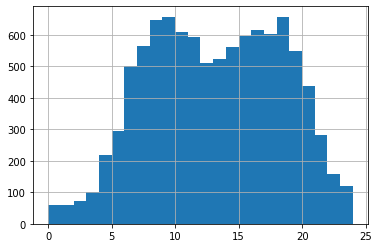

In [18]:
df['hour'] = df['created_time_datetime'].dt.hour+df['created_time_datetime'].dt.minute/60
df['hour'].hist(bins=24)

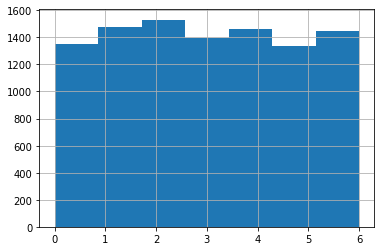

In [19]:
df["day_of_week"] = df['created_time_datetime'].dt.dayofweek
df['day_of_week'].hist(bins=7)
plt.show()

In [20]:
df.head()

,created_time,title,url,month,created_time_datetime,hour,day_of_week
id,,,,,,,
354189,Sun Sep 20 2020 06:28:55 GMT+0000 (Coordinated...,Mein Standort nach lorsch kulturerbe - Google ...,https://www.google.com/maps/dir/49.5267539;8.5...,Sep,2020-09-20 06:28:55,6.466667,6
20596,Fri Jul 28 2017 08:56:17 GMT+0000 (Coordinated...,(60 ungelesen) – anonymizedName – Yahoo Mail,https://mg.mail.yahoo.com/neo/launch?.rand=94n...,Jul,2017-07-28 08:56:17,8.933333,4
513182,Thu Jul 25 2019 10:33:08 GMT+0000 (Coordinated...,Song of Healing 10 Hours - YouTube,https://www.youtube.com/watch?v=WXnWfx6bIVE&t=...,Jul,2019-07-25 10:33:08,10.550000,3
951408,Thu Jun 25 2020 10:02:49 GMT+0000 (Coordinated...,OpinionHUB,https://s.cint.com/Survey/Complete/0b7c19f0-6e...,Jun,2020-06-25 10:02:49,10.033333,3
632599,Fri Jul 17 2020 05:18:56 GMT+0000 (Coordinated...,Please Wait,https://qps.cint.com/survey/a369700d-bb9a-c1dc...,Jul,2020-07-17 05:18:56,5.300000,4


## from the created_time column i extracted two features: day of week and hour

In [21]:
df.drop(columns=['month', 'created_time_datetime', 'created_time'], inplace=True)
df[['day_of_week', 'hour']].head()

,day_of_week,hour
id,,
354189,6,6.466667
20596,4,8.933333
513182,3,10.550000
951408,3,10.033333
632599,4,5.300000


# text features selection:
## 1.clean 'title' and 'url' to get relevant information
## 2. create an embedding model to transform text into numerical values"

In [22]:
import urllib
df['protocol'],df['domain'],df['path'],df['query'],df['fragment'] = zip(*df['url'].map(urllib.parse.urlsplit))

In [23]:
def get_relevant(column_name):
    ser = df[column_name].copy()
    ser.replace(r'^\s*$', np.NaN, regex=True, inplace=True)
    ser.replace(r"""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~""",' ', inplace=True)
    ser.replace(r"=.*=",' ', inplace=True)
    for idx in ser[~ser.isna()].index:
        i = ser.loc[idx]
        clean_i = re.sub(r"www",'', i)
        clean_i = re.sub(r"http|https",'', clean_i)
        I = re.findall('([A-Z]+[a-z]*|[a-z]+)', clean_i)
        
        if column_name=='domain' and len(I)>1:
            I = [word.strip().lower() for word in I]
            df.loc[idx, 'extention'] = I[-1]
#             I = I[:-1]
            I = [word.strip().lower() for word in I if len(word) >= 2 ]
        else:
            I = [word.strip().lower() for word in I if len(word) > 2 ]
            
        df.loc[idx, 'list_'+column_name]=' '.join(I)
    df['list_'+column_name] = df['list_'+column_name].replace(r'^\s*$', np.NaN, regex=True)

In [24]:
get_relevant('title')
get_relevant('fragment')
get_relevant('path')
get_relevant('domain')
get_relevant('query')

In [25]:
df['extention'].value_counts()

com    5246
de     3778
net     452
org      79
eu       41
       ... 
lu        1
li        1
tr        1
fun       1
ip        1
Name: extention, Length: 77, dtype: int64

In [26]:
df[['title','list_title']][~df['list_title'].isna()]

,title,list_title
id,,
354189,Mein Standort nach lorsch kulturerbe - Google ...,mein standort nach lorsch kulturerbe google maps
20596,(60 ungelesen) – anonymizedName – Yahoo Mail,ungelesen anonymized name yahoo mail
513182,Song of Healing 10 Hours - YouTube,song healing hours you tube
951408,OpinionHUB,opinion hub
632599,Please Wait,please wait
...,...,...
249870,Gerichtskosten – Betreuungsrecht-Lexikon,gerichtskosten betreuungsrecht lexikon
35136,Postbank: Schnell und bequem Girokonto eröffne...,postbank schnell und bequem girokonto ffnen ns...
826660,1&1 Webmail - E-Mail made in Germany,webmail mail made germany


In [27]:
df[['fragment','list_fragment']][~df['list_fragment'].isna()]

,fragment,list_fragment
id,,
375243,sie=lg;/g/11j34fws37;2;/m/037169;mt;fp;1;;,sie fws
697235,inbox/FMfcgxwKjBLSpKlNcWnZMbrVdwZcWplb,inbox fmfcgxw blsp zmbr vdw wplb
304616,Das-war-es-fuer-heute,das war fuer heute
527067,photos;aggregationId=101&albumid=101&filter=7&...,photos aggregation albumid filter
796113,f=INBOX.Trash,inbox trash
...,...,...
274536,search/meinungsclub/FMfcgxwJZJZlTPBQzbfwdCwnmN...,search meinungsclub fmfcgxw jzjzl tpbqzbfwd cw...
180875,f=INBOX&m=1552672436378010&method=showReadmail,inbox method show readmail
61267,view=home&op=translate&sl=pl&tl=de&text=Po%20d...,view home translate text dlugich latach spotka...


In [28]:
df[['path','list_path']][~df['list_path'].isna()]

,path,list_path
id,,
354189,/maps/dir/49.5267539;8.5796006/lorsch+kulturer...,maps dir lorsch kulturerbe data fed
20596,/neo/launch,neo launch
513182,/watch,watch
951408,/Survey/Complete/0b7c19f0-6ec5-4875-5bde-2e579...,survey complete bde
632599,/survey/a369700d-bb9a-c1dc-672c-4742da3376d9/q...,survey question
...,...,...
512584,/lnk/BAAAAP_Sk-8AAcxNbjwAAAUzy6YAAAAHrEIAAAAAA...,lnk baaaap aacx nbjw aaauzy yaaaahr eiaaaaaaay...
424959,/Survey/ReturnView/4f01b1fb-3076-6ce4-ddef-862...,survey return view ddef adca
780089,/router.php,router php


In [29]:
df[['domain','list_domain']][~df['list_domain'].isna()]

,domain,list_domain
id,,
354189,www.google.com,google com
20596,mg.mail.yahoo.com,mg mail yahoo com
513182,www.youtube.com,youtube com
951408,s.cint.com,cint com
632599,qps.cint.com,qps cint com
...,...,...
780089,www.ipsossurveyexperiment.com,ipsossurveyexperiment com
826660,navigator.1und1.de,navigator und de
13700,www.zuercher-presse.com,zuercher presse com


In [30]:
df[['query','list_query']][~df['list_query'].isna()]

,query,list_query
id,,
20596,.rand=94ndpsd8aumca,rand ndpsd aumca
513182,v=WXnWfx6bIVE&t=100s,wxn wfx ive
951408,cpx.red=1,cpx red
823744,competitionKey=tgd202001241410658615&slotId=1_...,competition key tgd slot mag gametype mag
93041,p=TG9nb3V0QWRQcm94eS5zZXJ2aWNlPXNraW5uYWJsZWxv...,qwrqcm zxj wnl pxnra ywjs zwxv czza xrl pxdl r...
...,...,...
780089,guid=DE1DSYCUZ&uid=150143152,guid dsycuz uid
826660,sid=31ac6a506f6695ab578c931cbc328f69db9ede4029...,sid cbc ede bea
13700,fbclid=IwAR1EfEptVgz1HJSZYaGZjLGhrietHHLiVSRAV...,fbclid ept vgz hjszya gzj lghriet hhli vsravdd...


In [31]:
df['url']

id
354189    https://www.google.com/maps/dir/49.5267539;8.5...
20596     https://mg.mail.yahoo.com/neo/launch?.rand=94n...
513182    https://www.youtube.com/watch?v=WXnWfx6bIVE&t=...
951408    https://s.cint.com/Survey/Complete/0b7c19f0-6e...
632599    https://qps.cint.com/survey/a369700d-bb9a-c1dc...
                                ...                        
780089    https://www.ipsossurveyexperiment.com/router.p...
826660    https://navigator.1und1.de/?sid=31ac6a506f6695...
13700     https://www.zuercher-presse.com/markus-soeder-...
532838    https://www.survey-cogitaris.de/?m=6031&url=ht...
460271    https://s.cint.com/Consent/Collect/5016d2bc-d2...
Name: url, Length: 9998, dtype: object

In [32]:
df['total_text'] = df['list_title'].fillna('')+' '+df['list_path'].fillna('')+' '+df['list_fragment'].fillna('')+' '+df['list_domain'].fillna('')+' '+df['list_query'].fillna('')+' '+df['extention'].fillna('')
df['total_text'].replace(r'^\s*$', np.NaN, regex=True,inplace=True)
df['l']=[type(s) for s in df['total_text']]
df['total_text'][df['l']==float]

Series([], Name: total_text, dtype: object)

In [33]:
df['total_text'][df['total_text'].isna()].sum()

0

In [34]:
df.drop(df['total_text'][df['l']==float].index, inplace=True)

sentences = list(df['total_text'].str.split())
combined = list(itertools.chain.from_iterable(sentences))

In [35]:
len(combined)

180166

In [36]:
len(set(combined))

39344

In [37]:
for i in range(10):
    print(sentences[i])

['mein', 'standort', 'nach', 'lorsch', 'kulturerbe', 'google', 'maps', 'maps', 'dir', 'lorsch', 'kulturerbe', 'data', 'fed', 'google', 'com', 'com']
['ungelesen', 'anonymized', 'name', 'yahoo', 'mail', 'neo', 'launch', 'mg', 'mail', 'yahoo', 'com', 'rand', 'ndpsd', 'aumca', 'com']
['song', 'healing', 'hours', 'you', 'tube', 'watch', 'youtube', 'com', 'wxn', 'wfx', 'ive', 'com']
['opinion', 'hub', 'survey', 'complete', 'bde', 'cint', 'com', 'cpx', 'red', 'com']
['please', 'wait', 'survey', 'question', 'qps', 'cint', 'com', 'com']
['cabrio', 'bay', 'kleinanzeigen', 'cabrio', 'ebay', 'kleinanzeigen', 'de', 'de']
['game', 'duell', 'mit', 'freunden', 'online', 'kostenlose', 'spiele', 'spielen', 'games', 'singleplayer', 'result', 'xhtml', 'mein', 'gameduell', 'de', 'competition', 'key', 'tgd', 'slot', 'mag', 'gametype', 'mag', 'de']
['web', 'mail', 'adresse', 'kostenlos', 'free', 'mail', 'mail', 'nachrichten', 'logoutlounge', 'web', 'de', 'qwrqcm', 'zxj', 'wnl', 'pxnra', 'ywjs', 'zwxv', 'czz

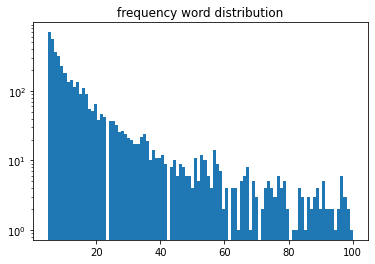

In [38]:
from collections import Counter

counter_keys = Counter(combined).keys() # equals to list(set(words))
counter_values = Counter(combined).values()

counter_values_np = np.fromiter(counter_values, dtype=float)

plt.hist(counter_values_np[(counter_values_np<=100)&(counter_values_np>=5)], bins=100, log=True)
plt.title('frequency word distribution')
plt.show()# counts the elements' frequency

In [39]:
len(set(combined))

39344

## the embedding model is going to contain about 3900 words

In [40]:
df_words = pd.DataFrame({'counts':counter_values}, index=counter_keys)
df_words[df_words['counts']>5]

,counts
mein,127
standort,6
nach,105
google,1836
maps,464
...,...
his,6
aah,6
focusgroup,6
vcg,8


In [41]:
df_words

,counts
mein,127
standort,6
nach,105
lorsch,4
kulturerbe,4
...,...
hhli,1
vsravdds,1
onf,1
lnseh,1


In [42]:
from gensim.models import Word2Vec
vector_size = 10
from gensim.models.fasttext import FastText


model = Word2Vec(vector_size = vector_size, min_count=5, negative=50, seed=21)
model.build_vocab(sentences)  # prepare the model vocabulary
model.train(sentences, total_examples=model.corpus_count, epochs=model.epochs)

model.save("word2vec.model")

In [43]:
test_words = df_words[df_words['counts']>300].index.to_list()
# test_words = [word for word in test_words if len(word)>=4]

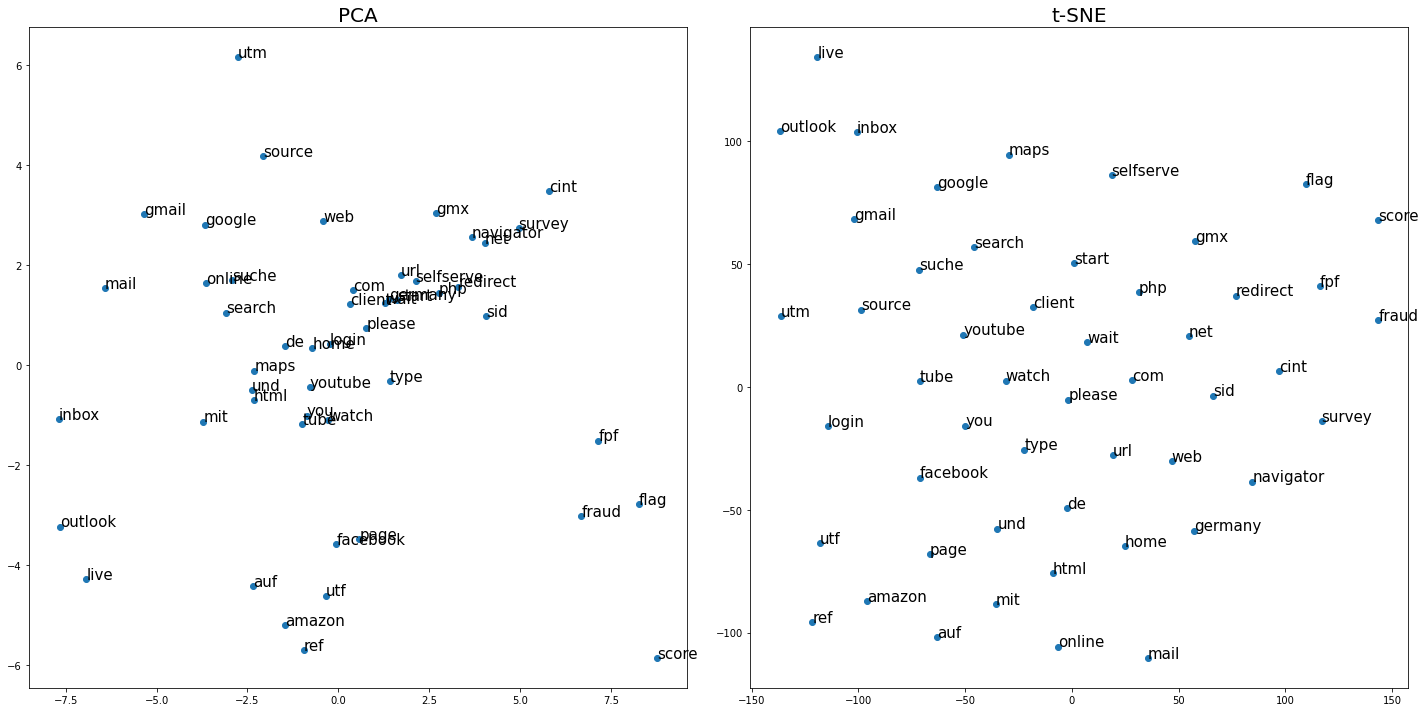

In [44]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib import pyplot

plt.figure(figsize=(20,10))
# define training data
sentences_test = test_words[:50]
# # train model
# model = Word2Vec(sentences, min_count=1)
# fit a 2d PCA model to the vectors
X = model.wv[sentences_test]

pca = PCA(n_components=2)
result = pca.fit_transform(X)

# create a scatter plot of the projection
plt.subplot(121)
pyplot.scatter(result[:, 0], result[:, 1])
words = list(sentences_test)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]), size=15)
plt.title('PCA', size=20)

tsne = TSNE(n_components=2, random_state=21)
result = tsne.fit_transform(X) 
plt.subplot(122)
pyplot.scatter(result[:, 0], result[:, 1])
words = list(sentences_test)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]), size=15)
plt.title('t-SNE', size=20)
plt.tight_layout()
pyplot.show()

In [46]:
len(model.wv.index_to_key)

4282

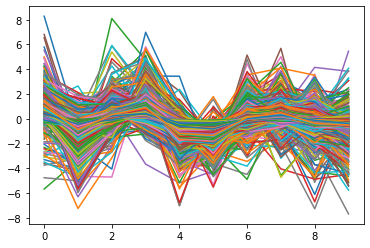

In [47]:
plt.plot(X.T)
plt.show()

### it would be good to chose words better to be more specific to the event

In [48]:
def vectorize(sentence):
    frequent_words = []
    weights = []
    for word in sentence:
        if word in model.wv.index_to_key:
            frequent_words.append(word)
            weight = float(df_words.loc[word].item())
            weights.append(weight)
#     print(weights)
    if len(frequent_words)>0:
        X = model.wv[frequent_words]/np.log10(np.array(weight))
#         X = model.wv[frequent_words]/np.array(weight)
        X_sum = X.sum(0)
        return X_sum 
    else:
        return np.zeros(vector_size)

In [49]:
 model.wv

In [50]:
vec = [vectorize(sentence) for sentence in sentences]

In [51]:
df['list_domain']

id
354189                   google com
20596             mg mail yahoo com
513182                  youtube com
951408                     cint com
632599                 qps cint com
                    ...            
780089    ipsossurveyexperiment com
826660             navigator und de
13700           zuercher presse com
532838          survey cogitaris de
460271                     cint com
Name: list_domain, Length: 9998, dtype: object

In [52]:
df['protocol'].value_counts()

https               9480
http                 502
file                  12
chrome-extension       3
moz-extension          1
Name: protocol, dtype: int64

# using emediding vectors for different columns

In [53]:
# df['list_path_query'] = df['list_path'].fillna('')+' '+df['list_query'].fillna('')

In [54]:
# DF = pd.DataFrame(index=df.index)

# for feature in ['title','domain', 'path_query']:
#     # separate the series into list
#     sentences_feature = list(df[f'list_{feature}'].str.split())
#     vec = [vectorize(sentence) if type(sentence)!=float else np.zeros(vector_size) for sentence in sentences_feature ]
#     df_feature = pd.DataFrame(np.array(vec), columns=[f'{feature}_'+str(i) for i in range(vector_size)], index=df.index)
#     DF = pd.concat((DF, df_feature), 1)

In [56]:
# list_extentions_to_keep = list(df['extention'].value_counts()[df['extention'].value_counts()>20].index)
# print(list_extentions_to_keep)
# print('len ', len(list_extentions_to_keep))

In [57]:
# dumies  = pd.get_dummies(df['extention'][df['extention'].isin(list_extentions_to_keep)])
# df.loc[dumies.index, dumies.columns] = dumies
# df[dumies.columns] = df[dumies.columns].fillna(0)
# df[dumies.columns].head()

In [58]:
vec = [vectorize(sentence) for sentence in sentences]
df[list(range(vector_size))] = np.array(vec)
df[list(range(vector_size))].head()

DF = df[range(vector_size)]
DF.head()

,0,1,2,3,4,5,6,7,8,9
id,,,,,,,,,,
354189,5.875256,-2.953725,-0.157313,4.861342,-2.864408,-7.014639,1.084482,-1.975462,-5.647605,2.928938
20596,8.004185,-5.731449,0.148440,4.388661,1.923964,-5.250661,0.744582,0.810351,-1.340015,1.221896
513182,2.098857,-1.814785,-0.349151,1.175228,-2.474667,-5.216595,-1.833777,-2.219950,-1.949201,-0.446770
951408,-0.385789,-5.770428,3.374034,0.366226,-4.248439,-5.418933,-1.710399,-0.566738,-7.999661,-0.008357
632599,-0.172930,-4.839267,3.175453,-0.513777,-3.427917,-6.330953,-1.083603,0.601908,-6.206107,0.636926


#### to preserve words embeding properties i am not normalizing text features. I will only scale time features

In [59]:
# DF = df[['hour','day_of_week']+list(range(vector_size))]
# DF[['hour','day_of_week']] = (DF[['hour','day_of_week']]-DF[['hour','day_of_week']].mean(0))/DF[['hour','day_of_week']].std(0)

In [60]:
DF.isna().any().any()
DF.replace([np.inf, -np.inf], 100, inplace=True)

c:\users\annas.desktop-4oc2lis\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:5233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [61]:
# DF = pd.concat((DF, df[dumies.columns].fillna(0)), 1)

In [62]:
DF.head()

,0,1,2,3,4,5,6,7,8,9
id,,,,,,,,,,
354189,5.875256,-2.953725,-0.157313,4.861342,-2.864408,-7.014639,1.084482,-1.975462,-5.647605,2.928938
20596,8.004185,-5.731449,0.148440,4.388661,1.923964,-5.250661,0.744582,0.810351,-1.340015,1.221896
513182,2.098857,-1.814785,-0.349151,1.175228,-2.474667,-5.216595,-1.833777,-2.219950,-1.949201,-0.446770
951408,-0.385789,-5.770428,3.374034,0.366226,-4.248439,-5.418933,-1.710399,-0.566738,-7.999661,-0.008357
632599,-0.172930,-4.839267,3.175453,-0.513777,-3.427917,-6.330953,-1.083603,0.601908,-6.206107,0.636926


In [63]:
DF.describe()

,0,1,2,3,4,5,6,7,8,9
count,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000
mean,3.799874,-4.775963,2.206325,3.628365,-5.237133,-6.491891,0.982106,1.486671,-2.579861,-1.545231
std,5.782589,6.193886,7.203044,5.790252,5.057569,4.723240,3.193158,3.574687,5.934120,4.648025
min,-26.498423,-57.124989,-12.250479,-6.447156,-74.482758,-80.101913,-12.441441,-10.044368,-39.745102,-35.644966
25%,1.732412,-5.501749,0.144195,0.317116,-6.543205,-7.556496,-0.896284,-0.583321,-4.442501,-2.248040
50%,3.163549,-3.339617,1.171203,2.108954,-3.948444,-5.307704,0.636072,0.744076,-1.672058,-0.738152
75%,5.390159,-1.576830,2.411298,4.791339,-2.499577,-3.723608,2.490702,2.863819,-0.093612,0.031427
max,75.016388,5.626139,52.623112,64.364090,5.051571,0.523592,15.816836,37.547562,19.219925,12.645151


In [64]:
pickle.dump(DF, open('DF', 'wb'))